# Multiple Linear Regression, Part 1: 

# Introducing Data Transformations and Model Validation

AKA - Topic 19 is too big to fit into one study group! We'll do part 1 today, focused on how we can better interpret the results of a linear regression model that includes multiple features, as well as on how to validate our models.

### First: Set Up

In [1]:
# Basic imports

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

Credit data from https://www.kaggle.com/avikpaul4u/credit-card-balance

Target: `Balance`

In [2]:
# Data
df = pd.read_csv('data/Credit.csv', 
                 usecols=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance'])

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Balance
0,14.891,3606,283,2,34,333
1,106.025,6645,483,3,82,903
2,104.593,7075,514,4,71,580
3,148.924,9504,681,3,36,964
4,55.882,4897,357,2,68,331


In [4]:
df.describe()

,Income,Limit,Rating,Cards,Age,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,1999.000000


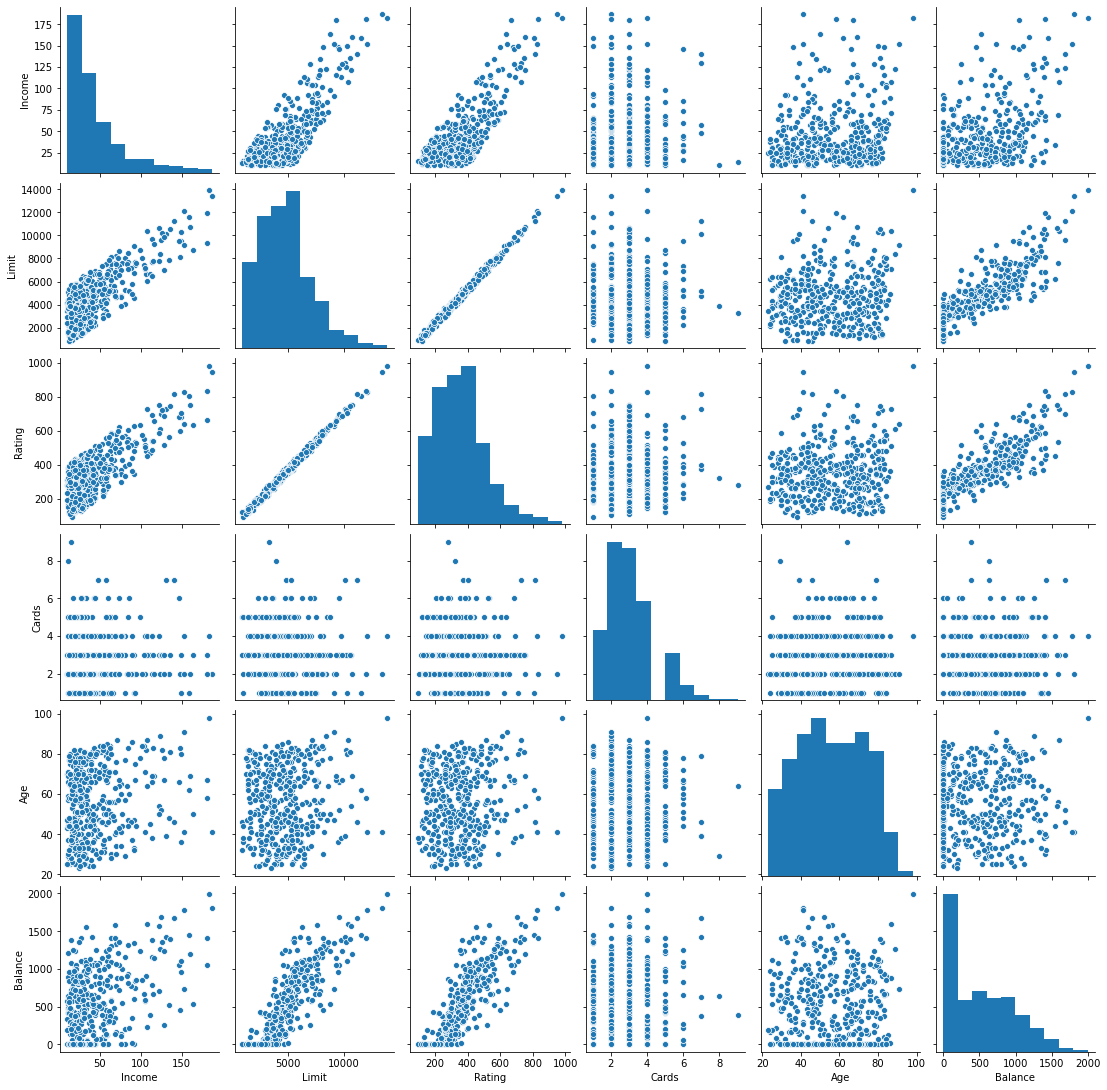

In [5]:
sns.pairplot(df)

## Multiple Linear Regression

Same as simple linear regression, but with more inputs!

In [6]:
# Let's start with statsmodels
import statsmodels.api as sm

In [7]:
df.columns.to_list()

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance']

In [8]:
# Define our X and y

# neat trick; include all column names in a list except for Balance
X_cols = [c for c in df.columns.to_list() if c not in ['Balance']]

X = df[X_cols]
y = df['Balance']

In [10]:
# Create our model
model = sm.OLS(y, sm.add_constant(X))

In [11]:
# Look at our results
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     567.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.61e-177
Time:                        17:09:30   Log-Likelihood:                -2598.5
No. Observations:                 400   AIC:                             5209.
Df Residuals:                     394   BIC:                             5233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -449.3610     40.574    -11.075      0.000    -529.130    -369.592
Income        -7.5621      0.382    -19.789      0.000      -8.313      -6.811
Limit          0.1286      0.053      2.430      0.016       0.025       0.233
Rating         2.0224      0.792      2.553      0.011       0.465       3.580
Cards         11.5527      7.063      1.636      0.103      -2.333      25.438
Age           -0.8883      0.478     -1.859      0.064      -1.828       0.051
==============================================================================
Omnibus:                       98.211   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.369
Skew:                           1.412   Prob(JB):                     8.30e-39
Kurtosis:                       4.596   Cond. No.                     2.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation time!

How'd we do? What looks different from the simple linear regression output? What in the world can we do with those coefficients?

Can't do anything with coefficients because of varying scale of data number of card versus limit are very different ranges of numbers. Need to standardize data to measure more equally.

## Standardization, AKA Feature Scaling and Centering

Scaling data is the process of **increasing or decreasing the magnitude according to a fixed ratio.** You change the size but not the shape of the data. Often, this involves divivding features by their standard deviation.

Centering also does not change the shape of the data, but instead simply **removes the mean value  of each feature** so that each is centered around zero instead of their original mean.

The idea is that you can standardize data to be standardized, so that a model can interpret each individual feature more consistently.

Documentation: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

#### [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

The most common method of scaling is standardization.  In this method we center the data, then we divide by the standard devation to enforce that the standard deviation of the variable is one.

#### [MinMax Scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

From the documentation:

> This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

#### [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

From the documentation:

> Scale features using statistics that are robust to outliers.
>
> This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Aka like a standard scaler, but uses median and IQR variance instead of mean and standard deviation.

In [12]:
# Importing some options so we can check out the differences between them
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [13]:
# Instantiating our different scalers
stdscaler = StandardScaler()
minmaxscaler = MinMaxScaler()
robscaler = RobustScaler()

# Creating scaled versions of one column
X_scaled_std = stdscaler.fit_transform(X['Age'].values.reshape(-1, 1))
X_scaled_mm = minmaxscaler.fit_transform(X['Age'].values.reshape(-1, 1))
X_scaled_rob = robscaler.fit_transform(X['Age'].values.reshape(-1, 1))
# why fit_transform? We'll discuss in a second

# defining a dictionary of these things to better visualize
scalers = {'Original': X['Age'].values, 
           'Standard Scaler': X_scaled_std, 
           'Min Max Scaler': X_scaled_mm,
           'Robust Scaler': X_scaled_rob}

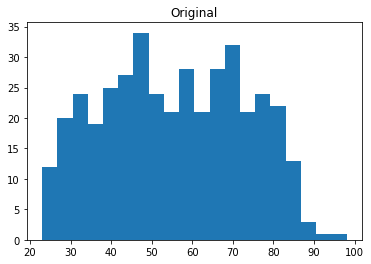

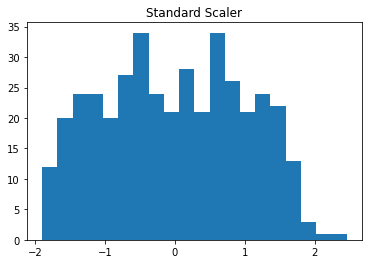

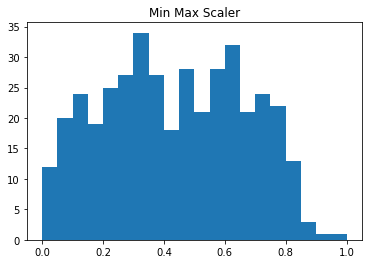

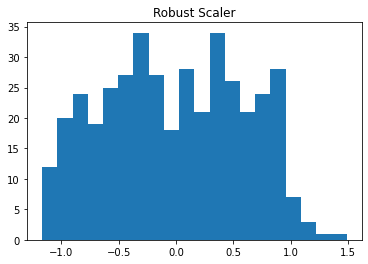

In [14]:
# visualize it!
for title, data in scalers.items():
    plt.hist(data, bins=20)
    plt.title(f"{title}")
    plt.show()

### Why do we need to use feature scaling?

- In order to compare the magnitude of coefficients thus increasing the interpretability of coefficients
- Handling disparities in units
- Some models use euclidean distance in their computations
- Some models require features to be on equivalent scales
- In the machine learning space, it helps improve the performance of the model and reducing the values/models from varying widely
- Some algorithms are sensitive to the scale of the data

### Let's Try It

In [16]:
# Instantiate a scaler and scale our data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

#the same as:
# scalar.fit(x)
#X_scaled = scaler.transform(X)

In [19]:
# New model on scaled data
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [20]:
# Look at our results
scaled_results = scaled_model.fit()

scaled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     567.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.61e-177
Time:                        17:22:22   Log-Likelihood:                -2598.5
No. Observations:                 400   AIC:                             5209.
Df Residuals:                     394   BIC:                             5233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        520.0150      8.078     64.374      0.000     504.133     535.897
x1          -266.1877     13.451    -19.789      0.000    -292.633    -239.743
x2           296.3555    121.934      2.430      0.016      56.633     536.078
x3           312.5234    122.400      2.553      0.011      71.884     553.163
x4            15.8221      9.673      1.636      0.103      -3.195      34.839
x5           -15.3041      8.232     -1.859      0.064     -31.488       0.880
==============================================================================
Omnibus:                       98.211   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.369
Skew:                           1.412   Prob(JB):                     8.30e-39
Kurtosis:                       4.596   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     567.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.61e-177
Time:                        17:22:39   Log-Likelihood:                -2598.5
No. Observations:                 400   AIC:                             5209.
Df Residuals:                     394   BIC:                             5233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -449.3610     40.574    -11.075      0.000    -529.130    -369.592
Income        -7.5621      0.382    -19.789      0.000      -8.313      -6.811
Limit          0.1286      0.053      2.430      0.016       0.025       0.233
Rating         2.0224      0.792      2.553      0.011       0.465       3.580
Cards         11.5527      7.063      1.636      0.103      -2.333      25.438
Age           -0.8883      0.478     -1.859      0.064      -1.828       0.051
==============================================================================
Omnibus:                       98.211   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.369
Skew:                           1.412   Prob(JB):                     8.30e-39
Kurtosis:                       4.596   Cond. No.                     2.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Evaluate:

What changed?

- Coefficients are much different in scaled versus original results
- Can see that some of the coefficients cancel each other out (scaled x4 and x5)


### Also - how do we interpret these coefficients, or those p-values in the summary?

Discuss:

- Look at p values < 0.05 to see what are the important impactful features 


<img src="https://patch.com/img/cal/sites/default/files/users/22985474/20180729202556/and_now_for_something_completely_different.jpg" alt="and now for something completely different" width=600>

## Model Validation - AKA How to Build Generalizable Models

![validation gif from giphy](https://media.giphy.com/media/242wLqQerWkxd6GgHB/giphy.gif)

### The Bias-Variance Trade Off

<img alt="original image from https://rmartinshort.jimdofree.com/2019/02/17/overfitting-bias-variance-and-leaning-curves/" src="images/underfit-goodfit-overfit.png" width=750, height=350>  

Remember - by modeling, we're assuming that there is some relationship between our X variables (the features in our dataset) and our y variable (the target). Thus, there is some underlying '_true_' function that captures the relationship between X and y, which we are trying to find by modeling. Of course, the actual relationship may be quite complex and not wholly represented in our data - our approximation, aka the model we create, is likely only a simplified estimator of whatever our '_true_' function actually would look like.

**Bias**: Error introduced by approximating a real-life problem (which may be extremely complicated) by a much simpler model (because the model is too simple to capture the underlying pattern)

**Variance**: Amount by which our model would change if we estimated it using a different training dataset (because the model is over-learning from the training data)

**Representation:**

<img alt="from https://hsto.org/files/281/108/1e9/2811081e9eda44d08f350be5a9deb564.png" src="images/bias-variance.png/" width=350, height=350>

## How To Minimize Bias and Variance

Good news! There are tried and true methods to reducing both bias and variance in our modeling process. Testing different models, trying models on different slices of data, transforming or engineering features - all of these things have a role to play in creating better, more robust models.

In particular, we've learned so far that we can evaluate the performance of our models, using a scoring metric, which will help us catch if a model is underfit - if it's performing quite poorly, it probably isn't capturing the relationship in our data! 

But what about overfitting?

###  Validation

Let's say you have a dataframe, with some number of rows of data, and that's all you have available to you. The hope is that you can train a model on this data that can then be used to make predictions about new data that comes in. You want your model to generalize well and work on this incoming data - not too complex from learning all the details/noise from the data, but also not so simple that the model is useless. How do we do that?

<img alt="I Love Lucy shrug gif from Giphy" src="https://media.giphy.com/media/JRhS6WoswF8FxE0g2R/giphy.gif" width=350, height=350>

### Train-Test Split

The idea: don't train your model on ALL of your data, but keep some of it in reserve to test on, in order to simulate how it will work on new/incoming data.

#### Example:

<img alt="original image from https://www.dataquest.io/wp-content/uploads/kaggle_train_test_split.svg plus some added commentary" src="images/traintestsplit_80-20.png" width=850, height=150>  

Note - here, it looks like we're just taking the tail end of the dataset and setting it aside. In practice (most of the time), the split will randomly choose which rows are in the train vs. test sets.

How does this fight against overfitting? By witholding data from the training process, we are testing whether the model actually _generalizes_ well. If it does poorly on the test set, it's a good sign that our model learned too much noise from the train set and is overfit! 

![arrested development gif, found by Andy](https://heavy.com/wp-content/uploads/2013/05/tumblr_mjm9fqhrle1rvnnvyo6_250.gif)

#### Practice:

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
print(X.shape)
X.head()

(400, 5)


,Income,Limit,Rating,Cards,Age
0,14.891,3606,283,2,34
1,106.025,6645,483,3,82
2,104.593,7075,514,4,71
3,148.924,9504,681,3,36
4,55.882,4897,357,2,68


In [24]:
print(y.shape)
y.head()

(400,)


0    333
1    903
2    580
3    964
4    331
Name: Balance, dtype: int64

In [25]:
# Train test split here!
# Set test_size = .33
# Set random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

What did that do?

In [26]:
X_train.shape

(268, 5)

In [27]:
X_test.shape

(132, 5)

In [28]:
len(X_train + X_test) == len(X)

True

In [29]:
X_train.head()

,Income,Limit,Rating,Cards,Age
258,41.400,2561,215,2,36
177,22.379,3965,292,2,34
119,23.012,1410,137,3,81
194,30.406,2120,181,2,79
229,69.943,7555,547,3,76


Now let's put our train/test split into practice:

In [30]:
# Instantiate a new scaler to scale our data
# Let's use Standard Scaler here
scaler = StandardScaler()

In [31]:
# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

scaler.fit(X_train) #fit on training data; learns mean and standard deviations of the columns that have been fit

#transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train.values #rows across the 5 coluumns

array([[4.1400e+01, 2.5610e+03, 2.1500e+02, 2.0000e+00, 3.6000e+01],
       [2.2379e+01, 3.9650e+03, 2.9200e+02, 2.0000e+00, 3.4000e+01],
       [2.3012e+01, 1.4100e+03, 1.3700e+02, 3.0000e+00, 8.1000e+01],
       ...,
       [1.5866e+01, 3.0850e+03, 2.1700e+02, 1.0000e+00, 3.9000e+01],
       [1.3433e+01, 1.1340e+03, 1.1200e+02, 3.0000e+00, 7.0000e+01],
       [6.8713e+01, 7.5820e+03, 5.3100e+02, 2.0000e+00, 5.6000e+01]])

In [35]:
X_train_scaled #rows across the 5 coluumns

array([[-0.10104321, -0.93872476, -0.90189213, -0.66979782, -1.25818834],
       [-0.65506615, -0.34489606, -0.41699176, -0.66979782, -1.37725418],
       [-0.63662882, -1.42554587, -1.39308991,  0.02596116,  1.42079318],
       ...,
       [-0.84476971, -0.71709638, -0.88929732, -1.3655568 , -1.07958957],
       [-0.91563548, -1.54228142, -1.5505251 ,  0.02596116,  0.76593103],
       [ 0.69450007,  1.18493186,  1.08808861, -0.66979782, -0.06752988]])

In [36]:
# Instantiate an sklearn linear model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [43]:
# Fit your model - ON THE TRAINING DATA!!

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
# Grab predictions for train and test set

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

In [45]:
# How'd we do?
from sklearn.metrics import r2_score

print(f"Train Score: {r2_score(y_train, y_pred_train)}")
print(f"Test Score: {r2_score(y_test, y_pred_test)}")

Train Score: 0.886882050887701
Test Score: 0.8500179616615862


Evaluate!

- Slightly overfit - higher train score than test score


### But Wait... There's More!

Let's change something and see what happens:

In [46]:
for n in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.33, 
                                                        random_state=n) # <--
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    
    y_pred_train = lr.predict(X_train_scaled)
    y_pred_test = lr.predict(X_test_scaled)
    
    print(f"Random Seed: {n}")
    print(f"Train R2 Score: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2 Score: {r2_score(y_test, y_pred_test)}")
    print("-----")

Random Seed: 0
Train R2 Score: 0.8827743316528185
Test R2 Score: 0.865687168763958
-----
Random Seed: 1
Train R2 Score: 0.8749498976551126
Test R2 Score: 0.8821530969365607
-----
Random Seed: 2
Train R2 Score: 0.8735830572848693
Test R2 Score: 0.883996868696491
-----
Random Seed: 3
Train R2 Score: 0.8995454439886379
Test R2 Score: 0.8337130318588979
-----
Random Seed: 4
Train R2 Score: 0.875437224172817
Test R2 Score: 0.8781140021225986
-----
Random Seed: 5
Train R2 Score: 0.8916801642210901
Test R2 Score: 0.8466484849652411
-----
Random Seed: 6
Train R2 Score: 0.8642965940479224
Test R2 Score: 0.8996957762399631
-----
Random Seed: 7
Train R2 Score: 0.8877156457889817
Test R2 Score: 0.8555914480287858
-----
Random Seed: 8
Train R2 Score: 0.8747040662140566
Test R2 Score: 0.8812357648090403
-----
Random Seed: 9
Train R2 Score: 0.8776062868954854
Test R2 Score: 0.8768879053835608
-----


What's happening here? All we're doing is changing our `random_seed` - why is that having such an impact on our model's scores? Some models appear overfit, some don't - and for some, the test score is **better** than our train score!

### K-Fold Cross-Validation

Sometimes, random chance means your training data isn't representative, or includes wacky data like all of our outliers. So, why do just one train-test split when you can do `k` number of them!

![cross validation image from kaggle: https://www.kaggle.com/alexisbcook/cross-validation](images/cross-validation.png)

The good news is, we'll never actually have to do this by hand - `sklearn` will handle it for us!

Documentation: https://scikit-learn.org/stable/modules/cross_validation.html

In [50]:
# Scale our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [51]:
# Instantiate a fresh linear regression model
lr_fresh = LinearRegression()

In [52]:
# Let's use cross_val_score
# Set cv = 5
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(lr_fresh, X_scaled, y)

array([0.86032456, 0.85549438, 0.88815586, 0.87332176, 0.88455654])

In [54]:
# Look at the test scores across our folds
scores = cross_val_score(lr_fresh, X_scaled, y)

In [55]:
# Print it nicely
print(f"Scores: {scores.mean():.3f} +/- {scores.std():.3f}")

Scores: 0.872 +/- 0.013


Why show the standard deviation of scores here? I want some measure of the variance among my scores, so I can tell how different my scores were based on different breakdowns of the training data.

If I made a change to my model and the average of my cross-validated scores stayed about the same, but the variance among those scores decreased, that's a better, more generalizable model than before!

### This Is Part 1....

In Part 2, we'll cover the assumptions of linear regression models, and how to check and transform to adapt to those assumptions. 

We'll table how to transform categorical variables to be able to be used in models until after the Winter Break, and cover that with Polynomial Regression in our Topic 20 study group!

### Additional Resources:

- [Excellent statistical writeup about how to interpret Linear Regression coefficients, and their p-values](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/)
- [Great bias/variance infographic](https://elitedatascience.com/bias-variance-tradeoff) from Elite Data Science